# KNN/tree-based regression

Things we will cover:
* Refresher on KNN
* How do we transform KNN into a regression algorithm?
* How do we transform decision trees into regression?
* Visualizing regression lines with KNN and trees
* Evaluating the performance

## KNN

First a refresher on KNN using Digits Classification

In [1]:
### Use small (8x8) handwritten digits dataset
from sklearn import datasets
import matplotlib.pyplot as plt

X, y = datasets.load_digits(return_X_y=True, as_frame=True)
X

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [2]:
X.iloc[0] #need .values to get only the values from all columns

pixel_0_0     0.0
pixel_0_1     0.0
pixel_0_2     5.0
pixel_0_3    13.0
pixel_0_4     9.0
             ... 
pixel_7_3    13.0
pixel_7_4    10.0
pixel_7_5     0.0
pixel_7_6     0.0
pixel_7_7     0.0
Name: 0, Length: 64, dtype: float64

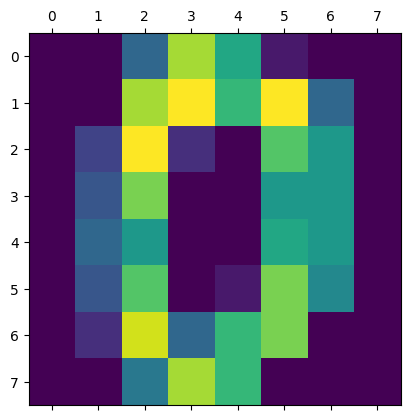

In [3]:
one_digit = X.iloc[0].values.reshape(8, 8)
one_digit
plt.matshow(one_digit)
# try iloc 30, which is another "0" digit

### No need to standardize data here because all features are on the same scale!

In [4]:
from sklearn import neighbors, model_selection, metrics

model = neighbors.KNeighborsClassifier(5)
xval = model_selection.KFold(10, shuffle=True)
scorer = metrics.make_scorer(metrics.cohen_kappa_score)
result = model_selection.cross_validate(model, X, y,
    scoring=scorer, cv=xval, return_train_score=True, return_estimator=True)
# return_estimator:  Whether to return the estimators fitted on each split.

result

{'fit_time': array([0.00400519, 0.00199938, 0.00300002, 0.00299978, 0.00300574,
        0.00199962, 0.00300384, 0.0030005 , 0.00299931, 0.00300574]),
 'score_time': array([0.89494157, 0.01900673, 0.01600051, 0.01799965, 0.01751709,
        0.01851773, 0.01951623, 0.01752257, 0.01751685, 0.01800585]),
 'estimator': [KNeighborsClassifier(),
  KNeighborsClassifier(),
  KNeighborsClassifier(),
  KNeighborsClassifier(),
  KNeighborsClassifier(),
  KNeighborsClassifier(),
  KNeighborsClassifier(),
  KNeighborsClassifier(),
  KNeighborsClassifier(),
  KNeighborsClassifier()],
 'test_score': array([0.98131035, 0.99375629, 0.98759262, 1.        , 0.99380187,
        0.98759049, 0.97513297, 0.98753655, 0.95003664, 1.        ]),
 'train_score': array([0.98969228, 0.98694134, 0.99037916, 0.98831703, 0.9917537 ,
        0.99037952, 0.98900382, 0.98832471, 0.99175813, 0.98832549])}

In [5]:
print('Test kappa mean =', result['test_score'].mean())
print('Test kappa SD =', result['test_score'].std())
print('Train kappa mean:', result['train_score'].mean())
print('Train kappa SD =', result['train_score'].std())

Test kappa mean = 0.9856757775415275
Test kappa SD = 0.013974454427839946
Train kappa mean: 0.9894875166474801
Train kappa SD = 0.0015070953973077962


## What about a regression dataset?

In [6]:
reg_X, reg_y = datasets.load_diabetes(return_X_y=True, as_frame=True)
reg_X
# s1 tc, total serum cholesterol
# s2 ldl, low-density lipoproteins
# s3 hdl, high-density lipoproteins
# s4 tch, total cholesterol / HDL
# s5 ltg, possibly log of serum triglycerides level
# s6 glu, blood sugar level

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [7]:
reg_y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [8]:
reg_y.describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64

In [9]:
features = ['s1', 's2', 's3', 's4', 's5', 's6']
reg_X[features].describe()
# Clearly, these data have already been standardized (not y but that is OK for KNN)
# Can you explain why?

,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [10]:
# Let's use EDA
import pandas as pd
pd.concat([reg_X[features], reg_y], axis='columns').corr()
# Note that technically we shouldn't make any decisions based on this info because it includes data that will become testing data
# What can we observe based on the correlation matrix?

,s1,s2,s3,s4,s5,s6,target
s1,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483
target,0.212022,0.174054,-0.394789,0.430453,0.565883,0.382483,1.000000


### KNN regression

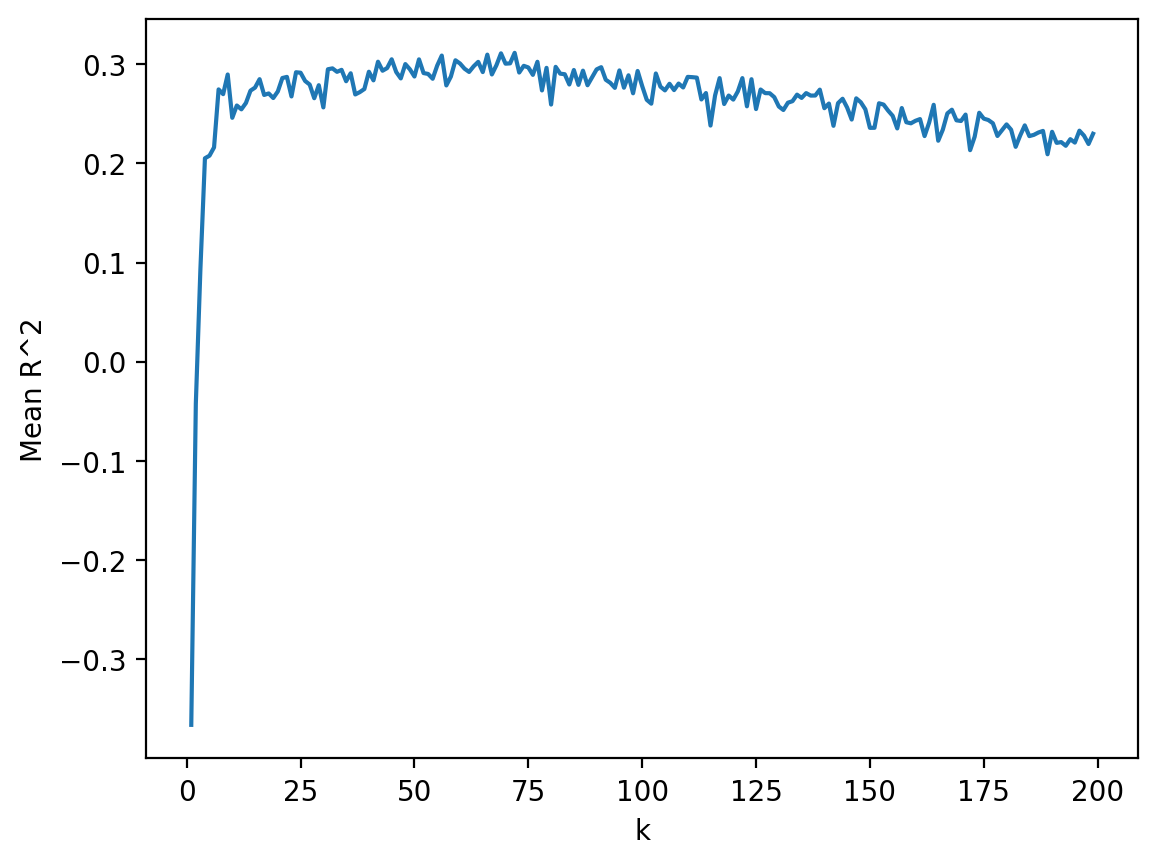

In [14]:
means = []
for k in range(1, 200):
    model = neighbors.KNeighborsRegressor(k)
    xval = model_selection.KFold(10, shuffle=True)
    result = model_selection.cross_validate(model, reg_X[features], reg_y, cv=xval, scoring='r2', return_train_score=True)
    #print('Test R^2 mean:', result['test_score'].mean())
    #print('Test R^2 SD:', result['test_score'].std())
    new_mean_score = result['test_score'].mean()
    means.append(new_mean_score)
# K makes quite a difference here
# Small K has low R^2 score, K = 25-60 works better
plt.figsize = (5, 10)
plt.figure(dpi=200)
plt.plot(range(1, 200), means)
plt.xlabel('k')
plt.ylabel('Mean R^2')
plt.show()

Linear regression works better here!
Why?

In [13]:
# Linear regression version
from sklearn import linear_model
model = linear_model.LinearRegression()
xval = model_selection.KFold(shuffle=True)
result = model_selection.cross_validate(model,
    reg_X[features], reg_y, cv=xval, scoring='r2',
    return_train_score=True)
print('Test R^2 mean:', result['test_score'].mean())
print('Test R^2 SD:', result['test_score'].std())
# Linear regression works better here! Why?

Test R^2 mean: 0.34002424023129774
Test R^2 SD: 0.02509762679729193


## Decision trees

Back to the digits classification task first

In [15]:
from sklearn import tree

model = tree.DecisionTreeClassifier(min_samples_leaf=5)
xval = model_selection.KFold(10, shuffle=True)
scorer = metrics.make_scorer(metrics.cohen_kappa_score)
result = model_selection.cross_validate(model, X, y,
    scoring=scorer, cv=xval, return_train_score=True)
print('Test kappa mean =', result['test_score'].mean())
print('Test kappa SD =', result['test_score'].std())
print('Train kappa mean:', result['train_score'].mean())
# This does not work as well as KNN, regardless of regularization. Why?

Test kappa mean = 0.8125010454025245
Test kappa SD = 0.02266455565064191
Train kappa mean: 0.9141847227251114


### As mentioned before, can't calculate Gini entropy for a regression problem. There is no "class" idea.

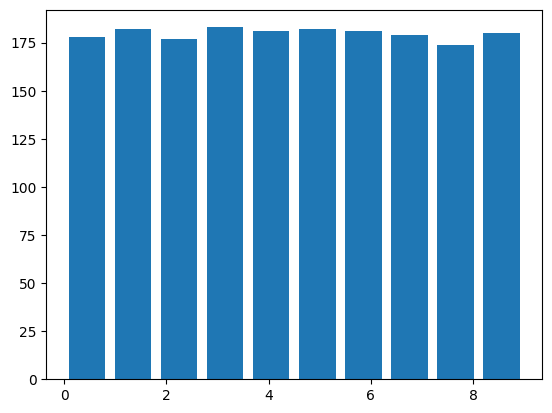

In [16]:
_ = plt.hist(y, bins=10, rwidth=.8)

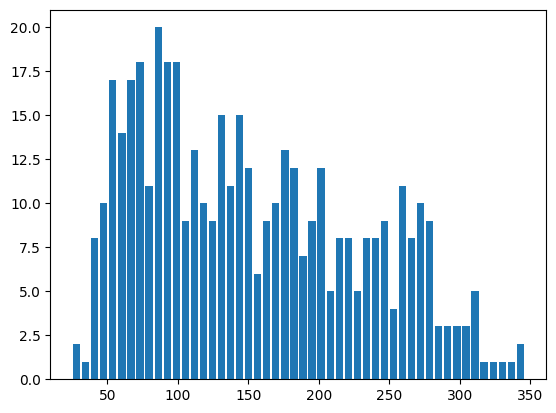

In [17]:
_ = plt.hist(reg_y, bins=50, rwidth=.8)

### Decision tree regression

In [18]:
prediction = reg_y.mean()
errors = reg_y - prediction
print('errors', errors)
squared_errors = errors ** 2
print('squared_errors', squared_errors)
mse = squared_errors.mean()
mse

errors 0      -1.133484
1     -77.133484
2     -11.133484
3      53.866516
4     -17.133484
         ...    
437    25.866516
438   -48.133484
439   -20.133484
440    67.866516
441   -95.133484
Name: target, Length: 442, dtype: float64
squared_errors 0         1.284786
1      5949.574379
2       123.954470
3      2901.601528
4       293.556280
          ...     
437     669.076642
438    2316.832298
439     405.357185
440    4605.863972
441    9050.379809
Name: target, Length: 442, dtype: float64


5929.884896910383

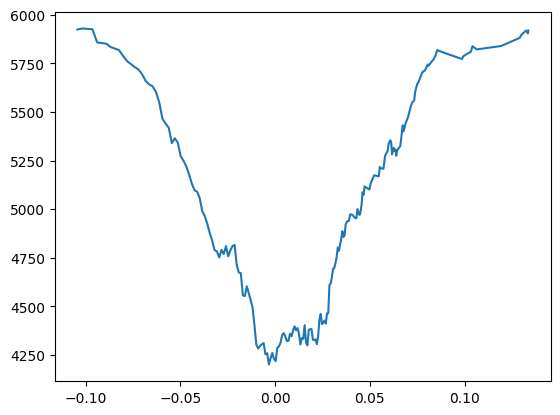

In [19]:
# Based on EDA, s5 is probably the best feature
# Manually find split based on Gini (below or above s5)
mse_values = []
uniq_values = sorted(reg_X.s5.unique())
for split_point in uniq_values[1:]:
    y_below = reg_y[reg_X.s5 < split_point]
    y_above = reg_y[reg_X.s5 >= split_point]
    prediction_below = y_below.mean()
    prediction_above = y_above.mean()
    mse_below = ((y_below - prediction_below) ** 2).mean()
    mse_above = ((y_above - prediction_above) ** 2).mean()
    weighted_mse = (mse_below * len(y_below) + mse_above * len(y_above)) / (len(y_below) + len(y_above))
    mse_values.append(weighted_mse)
plt.plot(uniq_values[1:], mse_values)

In [20]:
import numpy as np

best_index = np.argmin(mse_values)
print('Best s5 cutoff', uniq_values[best_index])

Best s5 cutoff -0.00422151393810765


### Stump tree to show sklearn

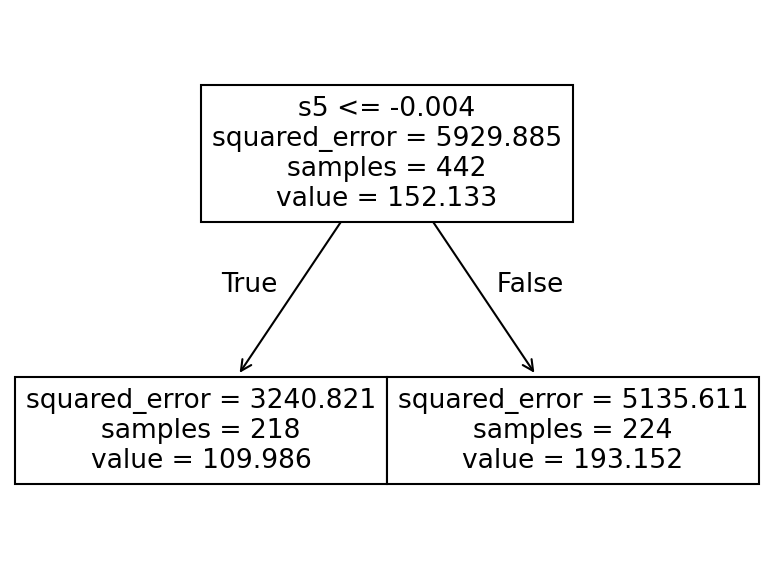

In [21]:
model = tree.DecisionTreeRegressor(min_samples_leaf=200)
model.fit(reg_X[features], reg_y)
plt.figure(dpi=150)
_ = tree.plot_tree(model, feature_names=features)
# Observe that it chooses the same feature we did (the best one) and the split point is basically exactly as expected

### Full tree regression

In [22]:
model = tree.DecisionTreeRegressor(min_samples_leaf=2)
xval = model_selection.KFold(10, shuffle=True)
result = model_selection.cross_validate(model,
    reg_X[features], reg_y, cv=xval, scoring='r2',
    return_train_score=True)


In [23]:
# Observe results are too low for min_samples_leaf=2. 
# Even worse with 1
# Retry with 5, 10, 20, 30 (works much better)
# Observe how train R^2 is close to 1 when model performs poorly
print('Test R^2 mean:', result['test_score'].mean())
print('Test R^2 SD:', result['test_score'].std())
print('Train mean R^2:', result['train_score'].mean())

Test R^2 mean: -0.17382018677956426
Test R^2 SD: 0.40715737248934697
Train mean R^2: 0.902693794049154


## Visualizing regression lines

But first, let's visualize the tree.

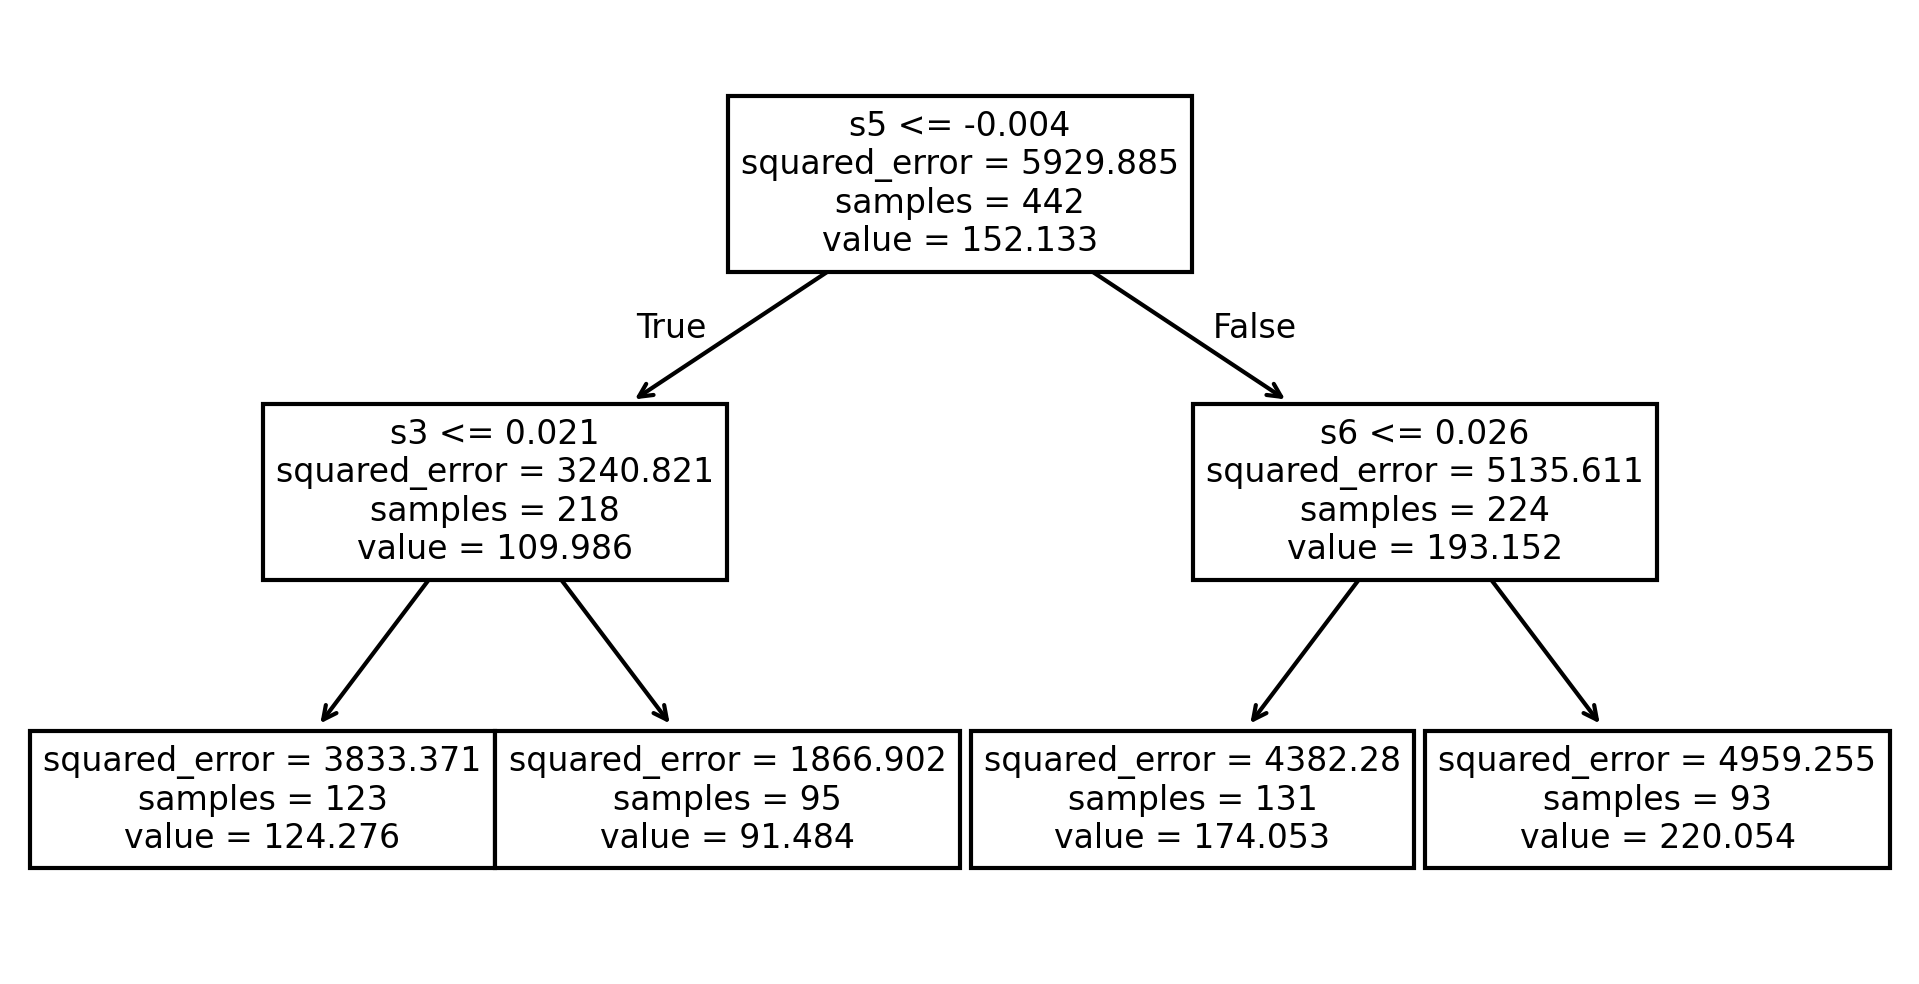

In [24]:
# Fit on whole dataset
model = tree.DecisionTreeRegressor(min_samples_leaf=90)
model.fit(reg_X[features], reg_y)
plt.figure(dpi=300, figsize=(8,4))  
# Takes ~15 seconds with min_samples_leaf=2
# min_samples_leaf=90 is a better number for being able to read it
_ = tree.plot_tree(model, feature_names=features)

Text(0, 0.5, 'Prediction')

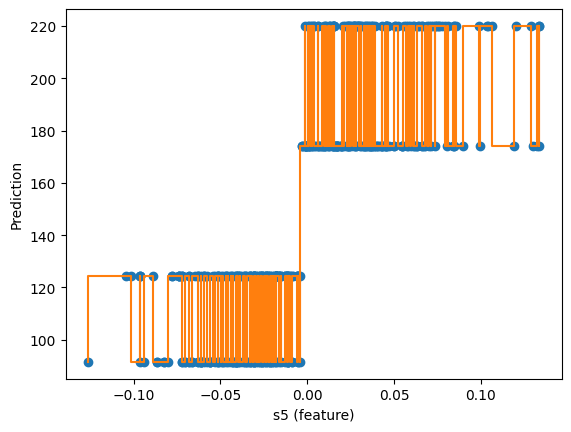

In [25]:
sorted_X = reg_X[features].sort_values('s5')
predictions = model.predict(sorted_X)
plt.figure(dpi=100)
plt.scatter(sorted_X.s5, predictions) #step plots connect data points with horizontal lines 
plt.step(sorted_X.s5, predictions, c='C1')
plt.xlabel('s5 (feature)')
plt.ylabel('Prediction')
# Lots of noise or rapid changes (steps) in predictions between very close values of s5. Why?

## Bike sharing example again with non-linear regression

URL for dataset from previous week.

In [26]:
bsdf = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv',
    encoding_errors='ignore')
bsdf

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


Text(0, 0.5, 'Number of bikes rented')

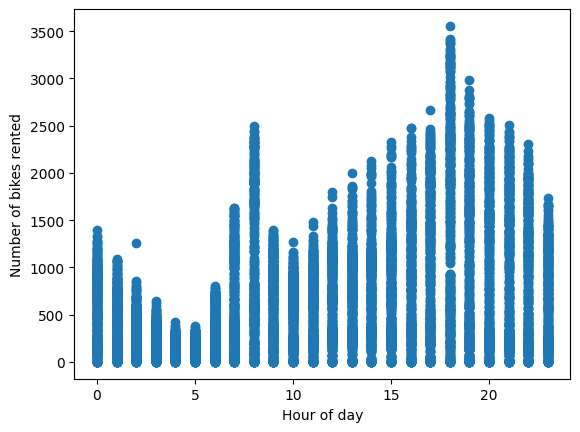

In [27]:
plt.figure(dpi=100)
plt.scatter(bsdf.Hour, bsdf['Rented Bike Count'])
plt.xlabel('Hour of day')
plt.ylabel('Number of bikes rented')

### Let's try nonlinear regression since there are clear non-linear patterns here.

#### First let's use linear regression as a reminder

In [28]:
xval = model_selection.KFold(10, shuffle=True)
model = linear_model.LinearRegression()
features = ['Temperature(C)', 'Hour', 'Wind speed (m/s)', 'Visibility (10m)']
bs_X = bsdf[features]
bs_y = bsdf['Rented Bike Count']
results = model_selection.cross_validate(model, bs_X, bs_y, cv=xval, return_train_score=True,
    scoring='r2')
print('Test R^2 mean:', results['test_score'].mean())
print('Test R^2 SD:', results['test_score'].std())
print('Train R^2 mean:', results['train_score'].mean())

Test R^2 mean: 0.43084874456084155
Test R^2 SD: 0.026462307288889
Train R^2 mean: 0.43223587713332884


#### Now let's try a Decision Tree regressor

In [29]:
xval = model_selection.KFold(10, shuffle=True)
# Note 1 it does poorly! Overfit!
# model = tree.DecisionTreeRegressor(min_samples_leaf=1)
model = tree.DecisionTreeRegressor(min_samples_leaf= 20)
features = ['Temperature(C)', 'Hour', 'Wind speed (m/s)', 'Visibility (10m)']
bs_X = bsdf[features]
bs_y = bsdf['Rented Bike Count']
results = model_selection.cross_validate(model, bs_X, bs_y, cv=xval, return_train_score=True,
    scoring='r2')
print('Test R^2 mean:', results['test_score'].mean())
print('Test R^2 SD:', results['test_score'].std())
print('Train R^2 mean:', results['train_score'].mean())

Test R^2 mean: 0.6325410058812986
Test R^2 SD: 0.022623458655045236
Train R^2 mean: 0.7184206173503156


#### Plot predictions based on only one non-linear feature:

Text(0, 0.5, 'Predicted/actual bikes rented')

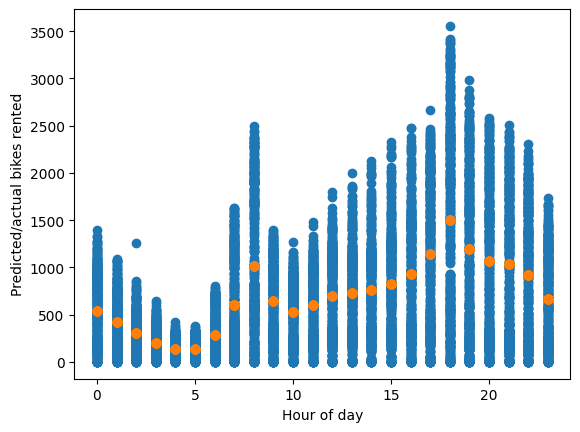

In [30]:
one_feature_X = bsdf[['Hour']]
model = tree.DecisionTreeRegressor(min_samples_leaf=20)
model.fit(one_feature_X, bs_y)
predictions = model.predict(one_feature_X)

plt.figure(dpi=100)
plt.scatter(bsdf.Hour, bs_y)
plt.scatter(bsdf.Hour, predictions, c='C1')
plt.xlabel('Hour of day')
plt.ylabel('Predicted/actual bikes rented')

# Why do predictions (orange points) look like this???